In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.simplefilter("ignore", UserWarning)

In [2]:
df = pd.read_csv('german_credit_data.csv')
del df['Unnamed: 0']

In [3]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education


# Часть 1. EDA и Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


### 2.Проведите EDA, чтобы познакомиться с признаками

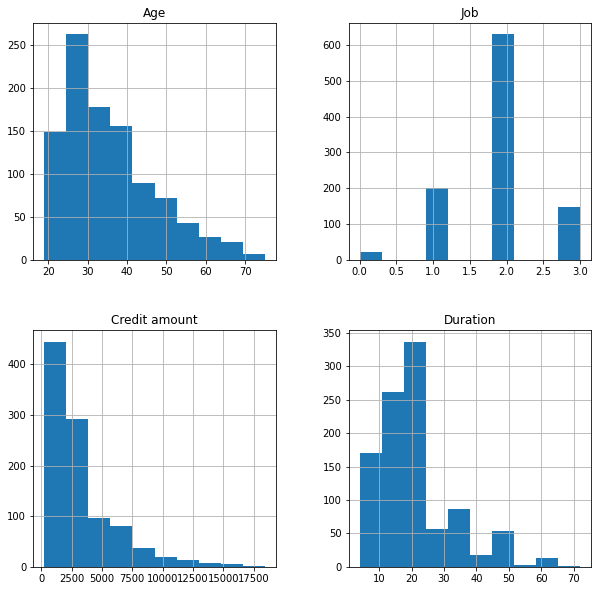

In [6]:
df.hist(figsize=(10,10));

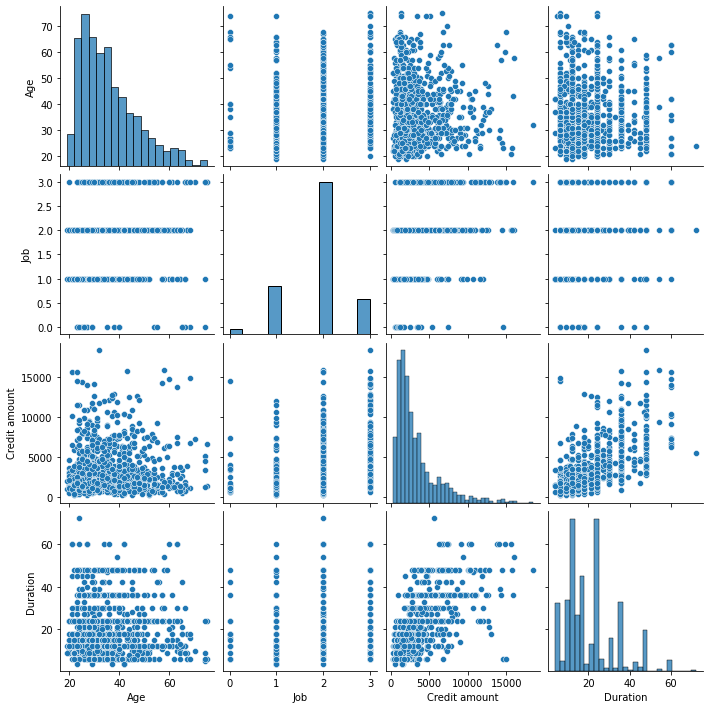

In [7]:
sns.pairplot(df);

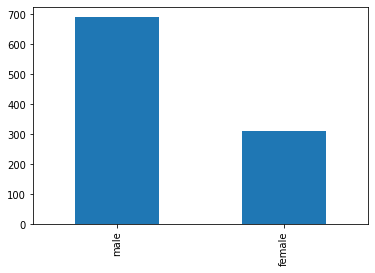

In [8]:
df['Sex'].value_counts().plot(kind='bar');

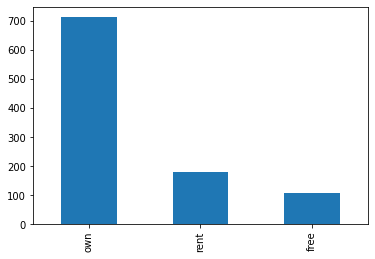

In [9]:
df['Housing'].value_counts().plot(kind='bar');

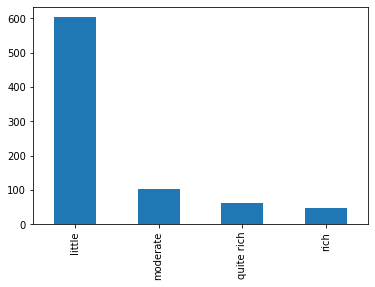

In [10]:
df['Saving accounts'].value_counts().plot(kind='bar');

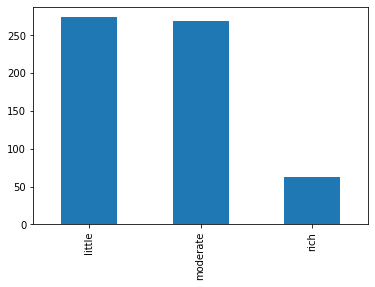

In [11]:
df['Checking account'].value_counts().plot(kind='bar');

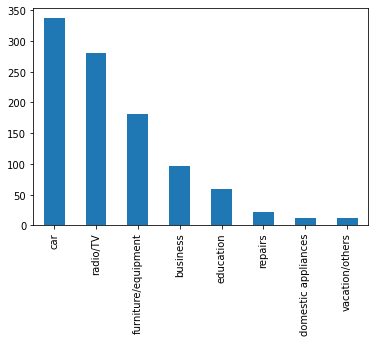

In [12]:
df['Purpose'].value_counts().plot(kind='bar');

In [13]:
corr = df.corr()

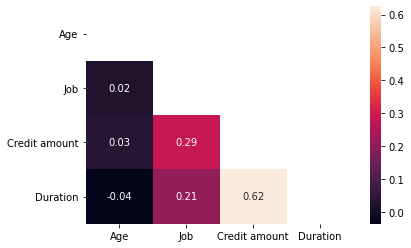

In [14]:
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f');

### 3.Преобразуйте все признаки в числовые подходящими методами

In [15]:
# оставим все пока в labeling encoding

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [17]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='male' else 0)

In [18]:
encoder = LabelEncoder()
for col in list(set(df.columns) - set(df._get_numeric_data().columns)):
    encoder.fit(df[col])
    print(encoder.classes_)
    df[col] = encoder.transform(df[col])

['little' 'moderate' 'quite rich' 'rich' nan]
['free' 'own' 'rent']
['business' 'car' 'domestic appliances' 'education' 'furniture/equipment'
 'radio/TV' 'repairs' 'vacation/others']
['little' 'moderate' 'rich' nan]


In [19]:
df.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,4,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,3,2096,12,3


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


### 4.Приведите все данные к одному масштабу (а заодно поясните, почему это необходимая операция при кластеризации).

Приведение к одному масштабу нужно, поскольку все алгоритмы кластеризации вычистяют расстояние, соотвественно, для корректной работы модели, мы должны передать данные в одной системе координат

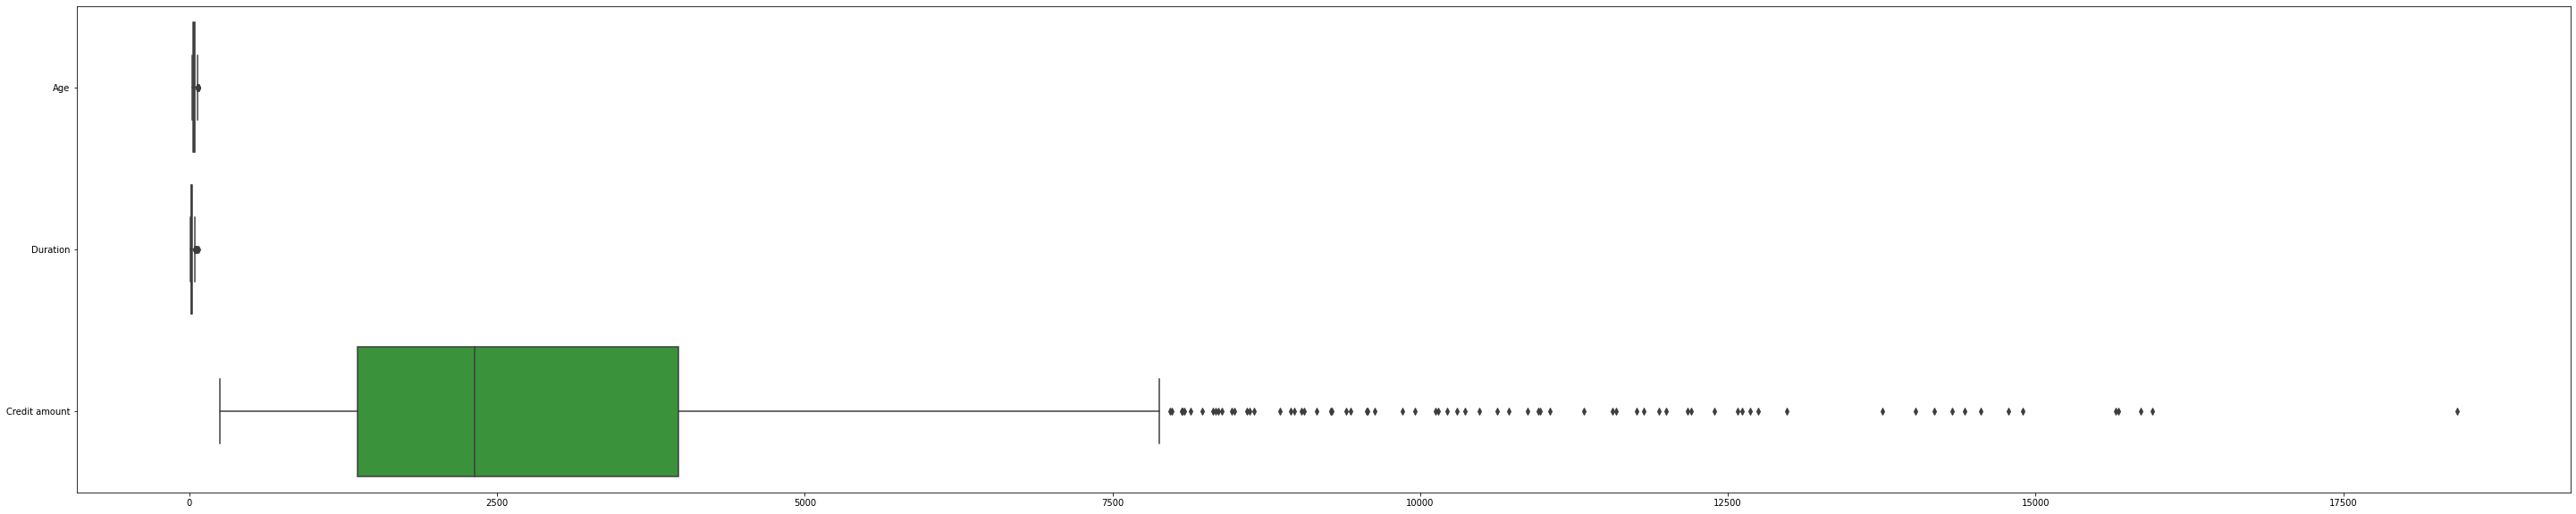

In [21]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df[['Age', 'Duration', 'Credit amount']], orient='h');

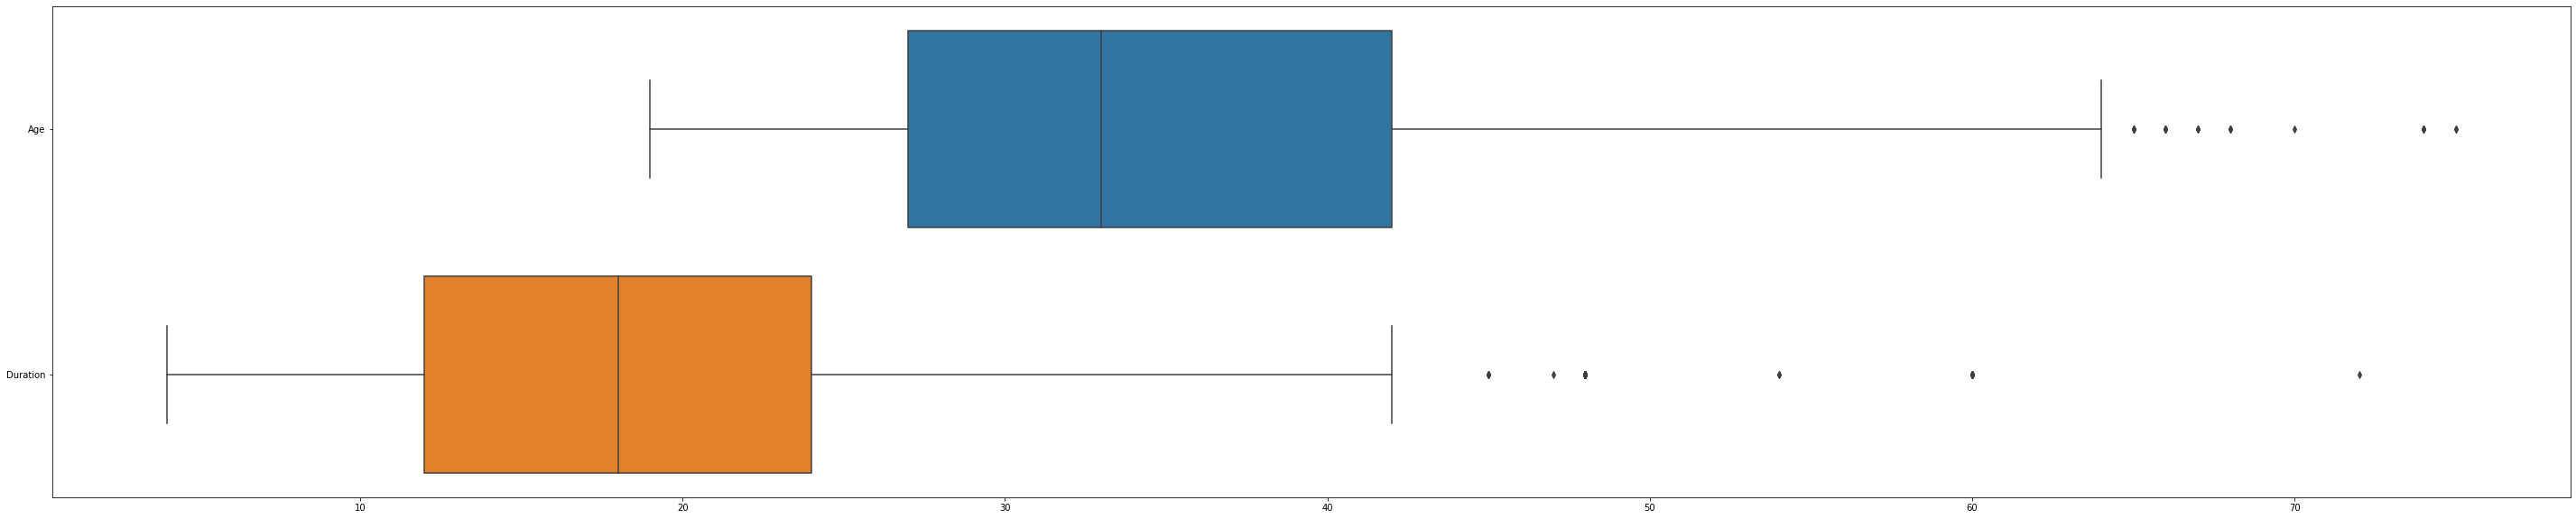

In [22]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df[['Age', 'Duration']], orient='h');

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df)
data_scaled = pd.DataFrame(X_scaled, columns=df.columns)

In [25]:
data_scaled.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0.857143,1.0,0.666667,0.5,1.0,0.000000,0.050567,0.029412,0.714286
1,0.053571,0.0,0.666667,0.5,0.0,0.333333,0.313690,0.647059,0.714286
2,0.535714,1.0,0.333333,0.5,0.0,1.000000,0.101574,0.117647,0.428571


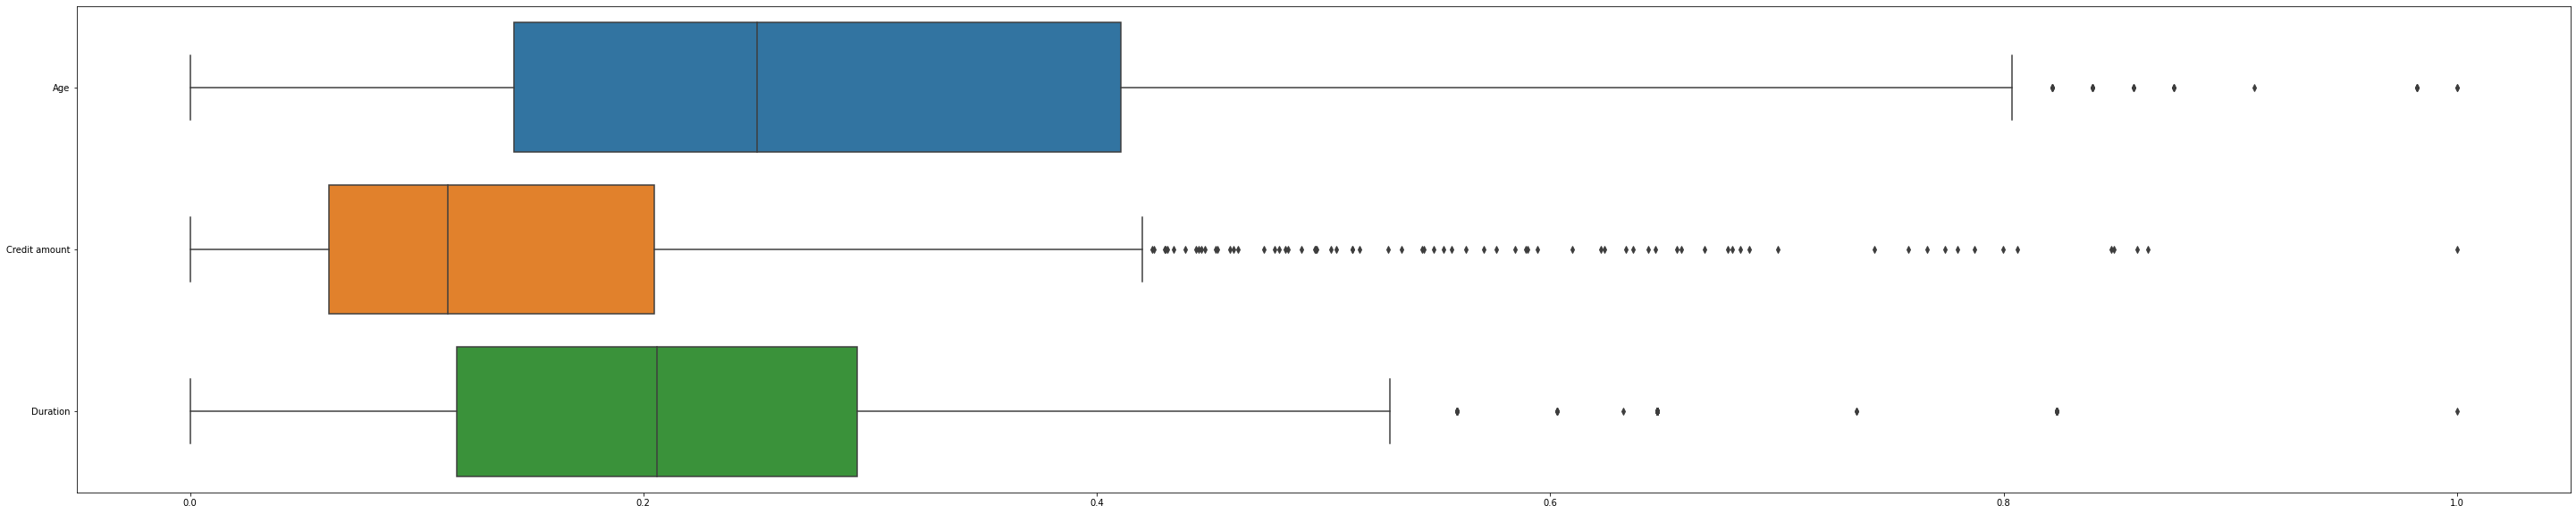

In [26]:
plt.figure(figsize=(50,10))
sns.boxplot(data=data_scaled[['Age', 'Credit amount', 'Duration']], orient='h');

# Часть 2. Моделирование

In [27]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2, random_state=42)

In [29]:
X_tsne = tsne.fit_transform(X_scaled)

/Users/kondratevask/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/kondratevask/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


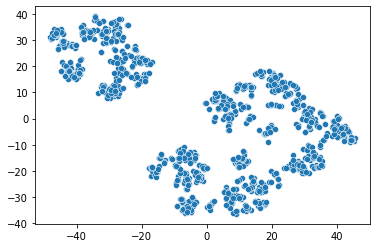

In [30]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1]);

Elbow method и Silhouette plot

### k-means

100%|██████████| 9/9 [00:00<00:00, 20.88it/s]


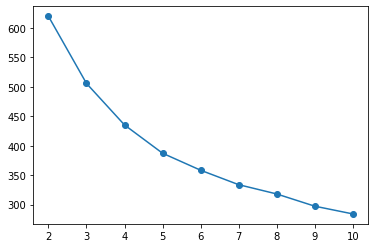

In [31]:
inertia = []
for i in tqdm(range(2,11)):
    kmeans = KMeans(n_clusters=i, random_state=42).fit(X_scaled)
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

plt.plot(range(2,11), inertia, marker='o');

100%|██████████| 9/9 [00:00<00:00, 14.25it/s]


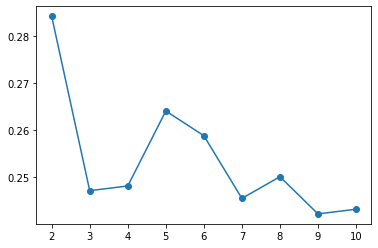

In [32]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = KMeans(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)
    

plt.plot(range(2,11), silhouette, marker='o');

In [33]:
# D = []
# for i in range(2,11):
#     Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
#     D.append(Di)
    
# plt.plot(range(2,10), D, marker='o');

In [34]:
# обучим модель с n_clusters=5
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
labels = kmeans.labels_

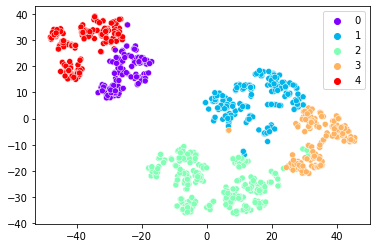

In [35]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [36]:
df['labels'] = labels
df['labels'].value_counts(normalize=True)

2    0.311
1    0.214
4    0.174
3    0.165
0    0.136
Name: labels, dtype: float64

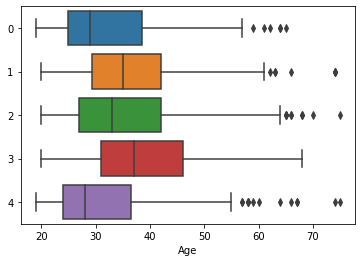

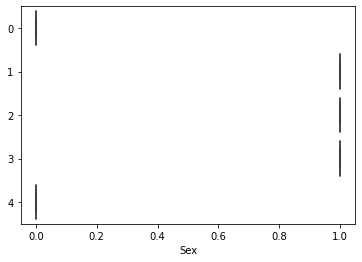

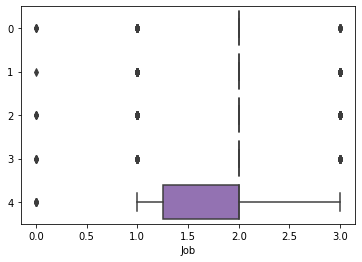

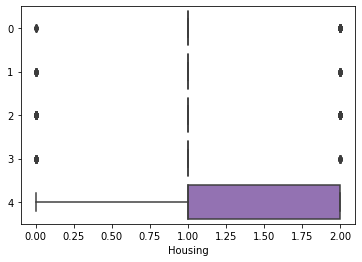

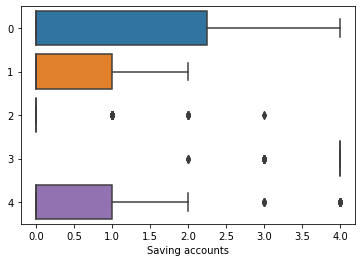

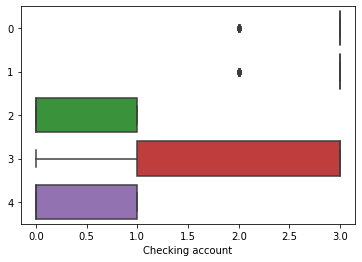

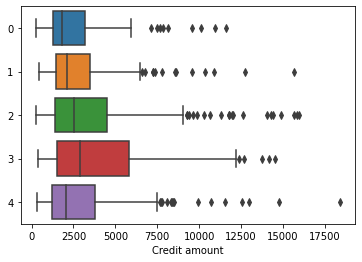

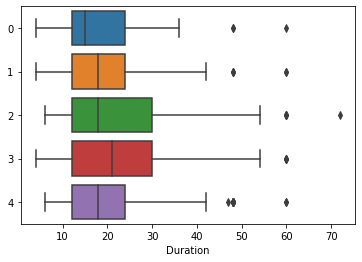

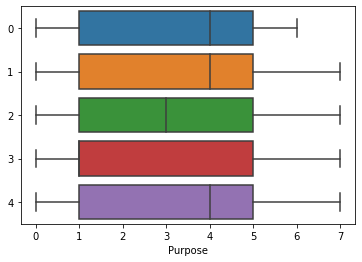

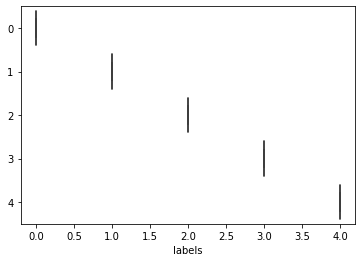

In [37]:
for col in df.columns:
    sns.boxplot(data=df, x=col, y=labels, orient='h')
    plt.show();

In [38]:
df.groupby('labels').median().T.round(2)

labels,0,1,2,3,4
Age,29.0,35.0,33.0,37.0,28.0
Sex,0.0,1.0,1.0,1.0,0.0
Job,2.0,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0,1.0
Saving accounts,0.0,0.0,0.0,4.0,0.0
Checking account,3.0,3.0,0.0,3.0,0.0
Credit amount,1840.5,2125.0,2522.0,2899.0,2082.5
Duration,15.0,18.0,18.0,21.0,18.0
Purpose,4.0,4.0,3.0,1.0,4.0


### hierarhical (Agglomerative Clustering)

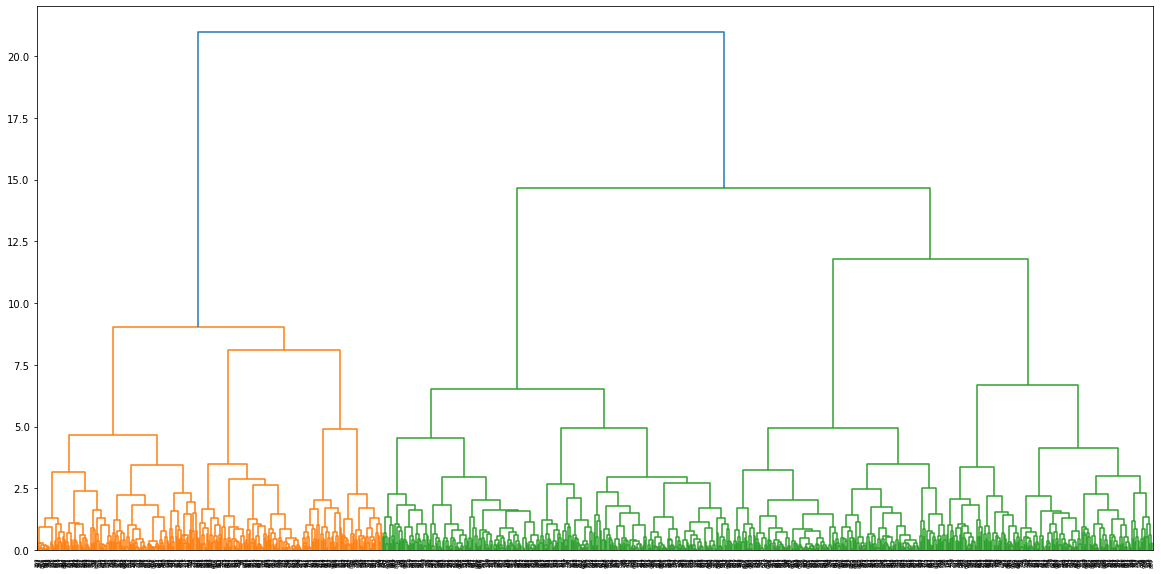

In [39]:
# строим дендрограмму
plt.figure(figsize=(20,10))
linkage_ = linkage(X_scaled, method='ward')
dendrogram_ = dendrogram(linkage_)

100%|██████████| 9/9 [00:00<00:00, 48.48it/s]


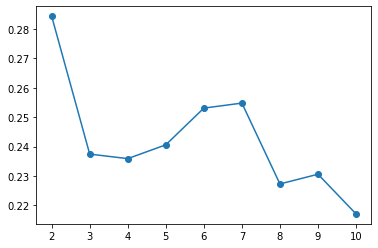

In [40]:
silhouette = []
for i in tqdm(range(2,11)):
    agg = AgglomerativeClustering(n_clusters=i).fit(X_scaled)
    labels = agg.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette.append(score)

plt.plot(range(2,11), silhouette, marker='o');

In [41]:
agg = AgglomerativeClustering(n_clusters=7).fit(X_scaled)
labels = agg.labels_

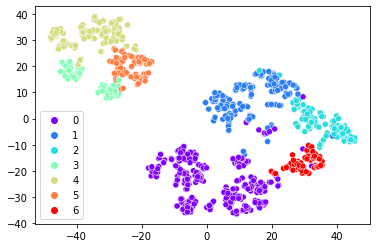

In [42]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [43]:
df['labels'] = labels
df['labels'].value_counts(normalize=True)

0    0.314
1    0.191
4    0.145
2    0.119
5    0.093
3    0.072
6    0.066
Name: labels, dtype: float64

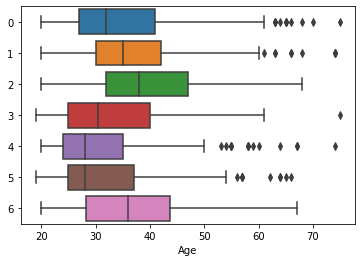

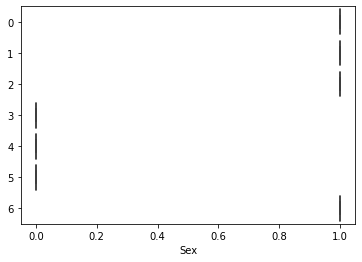

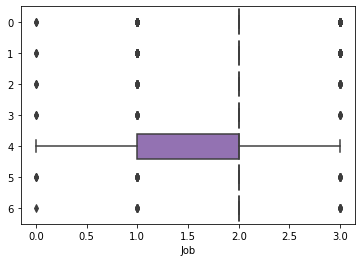

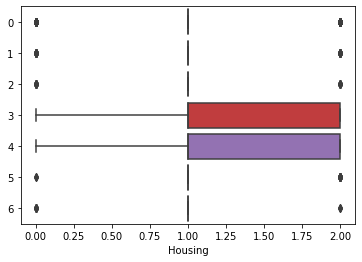

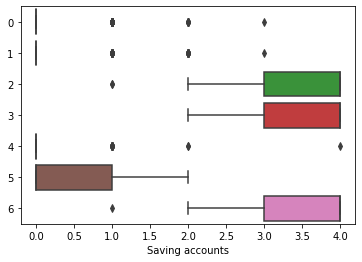

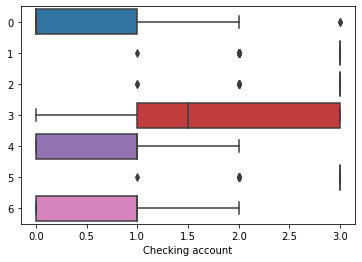

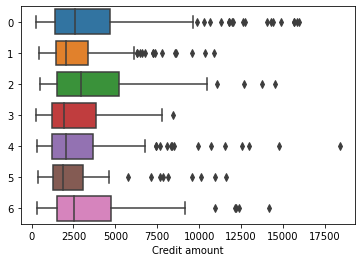

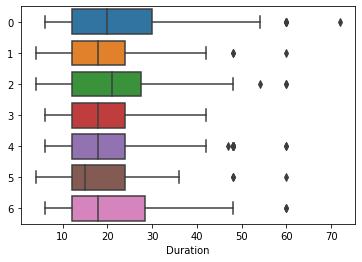

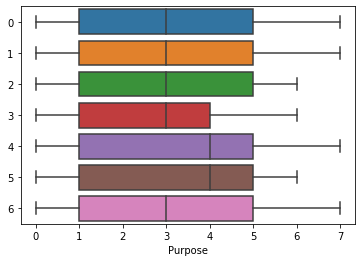

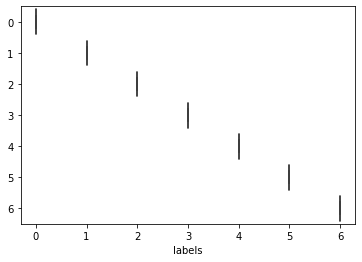

In [44]:
for col in df.columns:
    sns.boxplot(data=df, x=col, y=labels, orient='h')
    plt.show();

In [45]:
df.groupby('labels').median().T.round(2)

labels,0,1,2,3,4,5,6
Age,32.0,35.0,38.0,30.5,28.0,28.0,36.0
Sex,1.0,1.0,1.0,0.0,0.0,0.0,1.0
Job,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Saving accounts,0.0,0.0,4.0,4.0,0.0,0.0,4.0
Checking account,0.0,3.0,3.0,1.5,1.0,3.0,1.0
Credit amount,2611.0,2080.0,2978.0,1946.0,2039.0,1864.0,2537.0
Duration,20.0,18.0,21.0,18.0,18.0,15.0,18.0
Purpose,3.0,3.0,3.0,3.0,4.0,4.0,3.0


### DBSCAN

In [46]:
def dbscan_clustering(eps_range, X):
    eps_range = eps_range
    silhouette = []
    clusters = []
    for i in tqdm(eps_range):
        dbscan = DBSCAN(eps=i).fit(X)
        labels = dbscan.labels_
        uniq_labels = np.unique(labels)
        n_clusters = len(uniq_labels[uniq_labels != -1])
        if n_clusters > 1:
            score = silhouette_score(X, labels)
        else:
            score = 0
        silhouette.append(score)
        clusters.append(n_clusters)
        
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.plot(eps_range, silhouette, marker='o', color=color)
    ax1.set_xlabel('eps')
    ax1.set_ylabel('silhouette', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.plot(eps_range, clusters, marker='o', color=color)
    ax2.set_ylabel('n_clusters', color=color)  
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

100%|██████████| 90/90 [00:02<00:00, 38.17it/s]


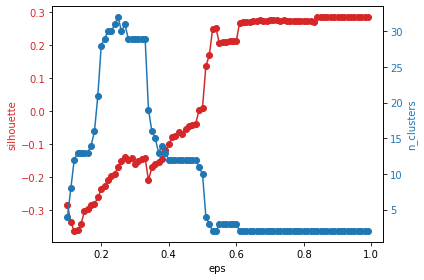

In [47]:
eps_range = np.arange(0.1,1,0.01)
dbscan_clustering(eps_range, X_scaled)

100%|██████████| 30/30 [00:00<00:00, 38.31it/s]


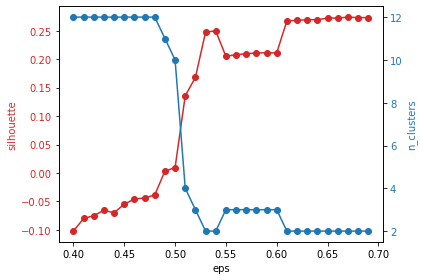

In [48]:
eps_range = np.arange(0.4,0.7,0.01)
dbscan_clustering(eps_range, X_scaled)

In [49]:
dbscan = DBSCAN(eps=0.48).fit(X_scaled)
labels = dbscan.labels_

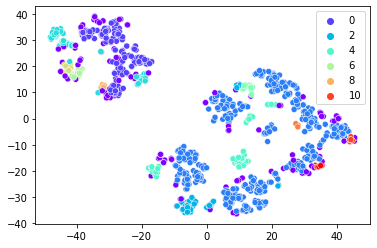

In [50]:
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

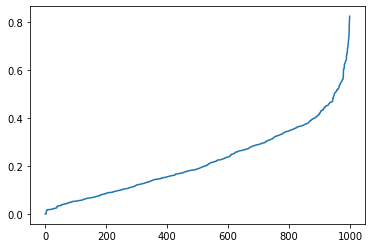

In [51]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
nbrs = neighbors.fit(X_scaled)
distance, indices = nbrs.kneighbors(X_scaled)

distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance);

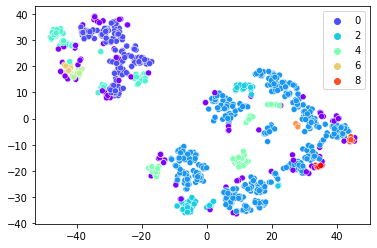

In [52]:
dbscan = DBSCAN(eps=0.5).fit(X_scaled)
labels = dbscan.labels_
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=labels, palette='rainbow');

In [53]:
df['labels'] = labels

In [54]:
df['labels'].value_counts(normalize=True)

 1    0.501
 0    0.169
-1    0.097
 3    0.070
 4    0.059
 2    0.057
 5    0.017
 6    0.012
 9    0.007
 8    0.006
 7    0.005
Name: labels, dtype: float64

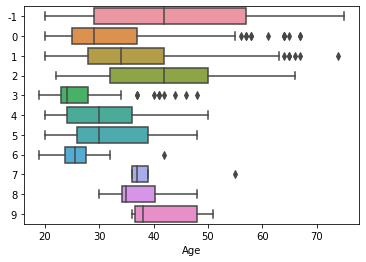

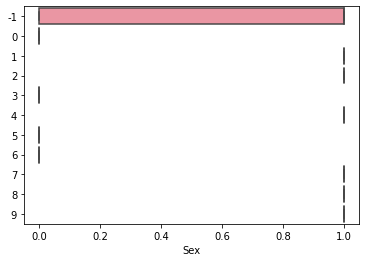

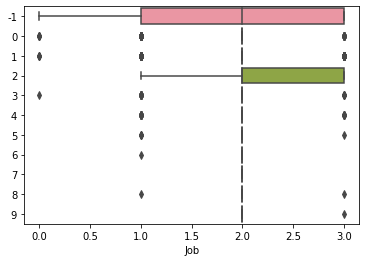

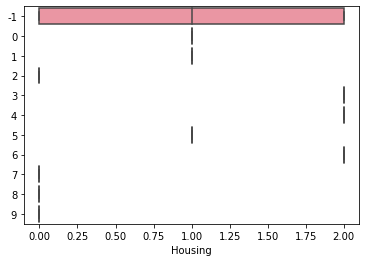

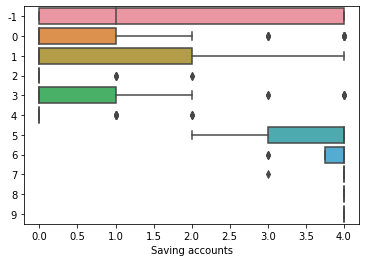

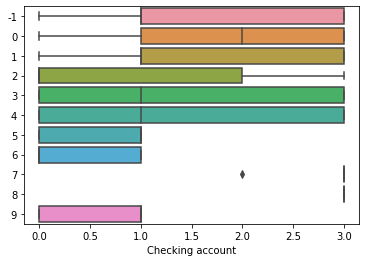

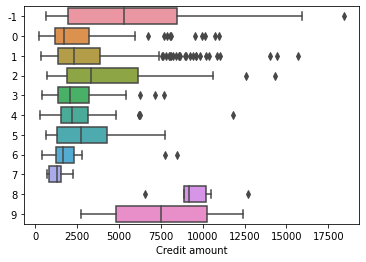

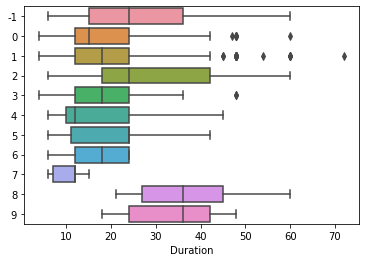

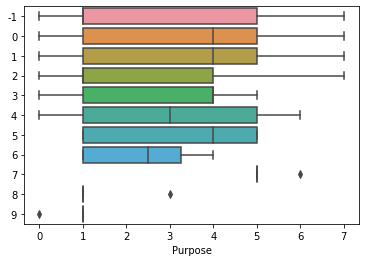

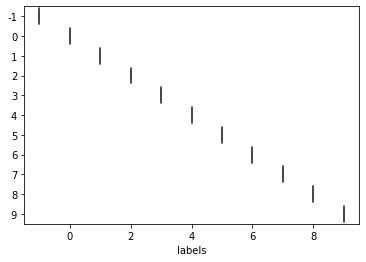

In [55]:
for col in df.columns:
    sns.boxplot(data=df, x=col, y=labels, orient='h')
    plt.show();

In [56]:
df.groupby('labels').median().T.round(2)

labels,-1,0,1,2,3,4,5,6,7,8,9
Age,42.0,29.0,34.0,42.0,24.0,30.0,30.0,25.5,37.0,35.0,38.0
Sex,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
Job,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Housing,1.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0
Saving accounts,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,4.0,4.0
Checking account,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,1.0
Credit amount,5324.0,1736.0,2326.0,3349.0,2081.5,2210.0,2762.0,1647.5,1271.0,9166.0,7511.0
Duration,24.0,15.0,18.0,24.0,18.0,12.0,24.0,18.0,12.0,36.0,36.0
Purpose,1.0,4.0,4.0,1.0,4.0,3.0,4.0,2.5,5.0,1.0,1.0
